In [1]:
# This demo draws heavily from the handwritten digit example in
# Chapter 2 of Francois Chollet's "Deep Learning with Python" book.
# I've added a simpler single-layer example first before moving to
# the 2-layer example. -George Chen (CMU Fall 2017)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(train_images.shape)

(60000, 28, 28)


In [3]:
print(test_images.shape)

(10000, 28, 28)


In [4]:
flattened_train_images = train_images.reshape(len(train_images), -1)  # flattens out each training image
flattened_train_images = flattened_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
flattened_test_images = test_images.reshape(len(test_images), -1)  # flattens out each test image
flattened_test_images = flattened_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

from keras.utils import to_categorical
train_labels_categorical = to_categorical(train_labels)#OHE
test_labels_categorical = to_categorical(test_labels)#OHE

In [6]:
train_labels[0]
train_labels.shape

(60000,)

In [7]:
train_labels_categorical[0]
####After OHE
train_labels_categorical.shape

(60000, 10)

In [8]:
print(flattened_train_images.shape)

(60000, 784)


37982


(-0.5, 27.5, 27.5, -0.5)

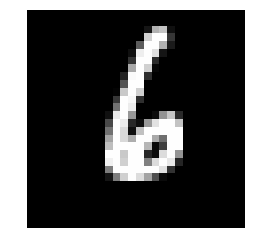

In [9]:
# this plots out one of the training images
idx = np.random.randint(len(train_images))  # random training image index
print(idx)
plt.imshow(train_images[idx], cmap='gray')
plt.axis('off')

(784, 10)


(-0.5, 9.5, 783.5, -0.5)

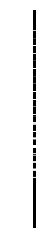

In [19]:
# this is just to visualize what the flattened version of the image above looks like;
# after flattening the image I replicate it horizontally (by 10 pixels) just for
# visualization purposes since otherwise the image is so thin (horizontally) that
# it's not easy to see anything.shape
print(np.hstack([train_images[idx].flatten().reshape((784,1))]*10).shape)
plt.imshow(np.hstack([train_images[idx].flatten().reshape((784,1))]*10), cmap='gray')
plt.axis('off')

In [22]:
# extremely shallow single-layer model
shallow_single_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
#Keras.layer.Dense(output,activation,input)
shallow_single_layer_model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))
shallow_single_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
shallow_single_layer_model.compile(optimizer='rmsprop',
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

In [24]:
shallow_single_layer_model.fit(flattened_train_images,
                               train_labels_categorical,
                               epochs=5,
                               batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.6064 - acc: 0.8489
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3308 - acc: 0.9077
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3013 - acc: 0.9159
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2882 - acc: 0.9200
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2800 - acc: 0.9217


In [25]:
test_loss, test_acc = shallow_single_layer_model.evaluate(flattened_test_images,
                                                          test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/step
Test accuracy: 0.9243


In [26]:
# two-layer model
two_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
two_layer_model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
two_layer_model.add(layers.Dense(10, activation='softmax'))
two_layer_model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
two_layer_model.fit(flattened_train_images,
                    train_labels_categorical,
                    epochs=5,
                    batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 12s 197us/step - loss: 0.2610 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.1036 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.0676 - acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.0488 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.0366 - acc: 0.9890


In [28]:
test_loss, test_acc = two_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 136us/step
Test accuracy: 0.981
